In [1]:
import pandas as pd

In [2]:
import numpy as np
from scipy import stats

In [3]:
beml_df = pd.read_csv("c:/Users/dell/Downloads/Beml.csv")
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [4]:
glaxo_df = pd.read_csv("c:/Users/dell/Downloads/Glaxo.csv")

In [5]:
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [6]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date','Close']]

In [7]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [8]:
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [9]:
glaxo_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80
...,...,...
2016-12-26,2016-12-26,2723.50
2016-12-27,2016-12-27,2701.75
2016-12-28,2016-12-28,2702.15


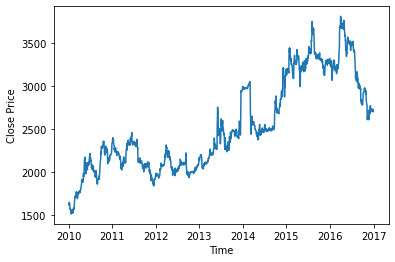

In [10]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(glaxo_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

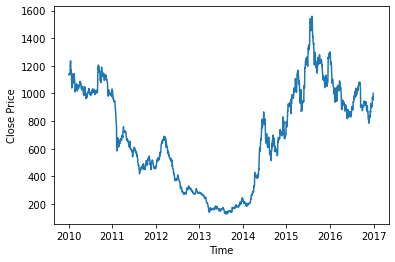

In [11]:
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

In [12]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)

In [13]:
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

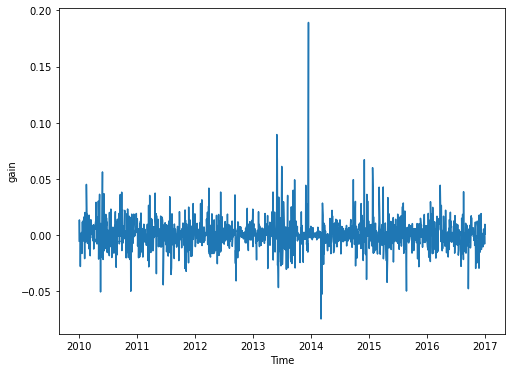

In [14]:
plt.figure(figsize = (8, 6));
plt.plot(glaxo_df.index, glaxo_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');

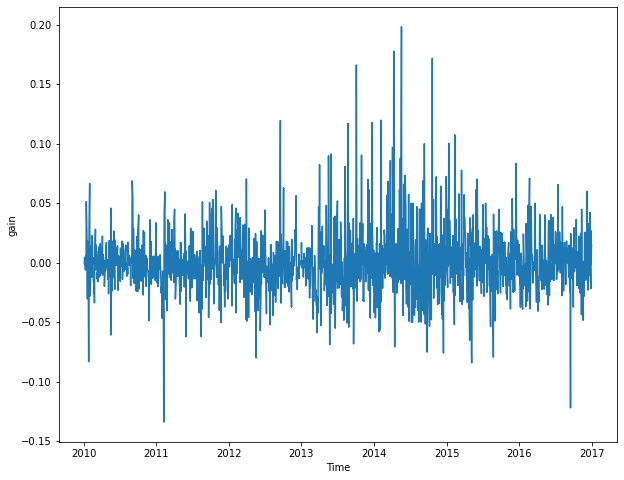

In [15]:
plt.figure(figsize = (10, 8));
plt.plot(beml_df.index, beml_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


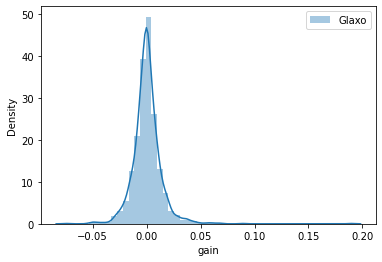

In [16]:
sn.distplot(glaxo_df.gain, label = 'Glaxo');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


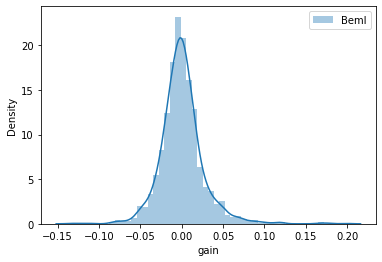

In [17]:
sn.distplot(beml_df.gain, label = 'Beml');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

In [18]:
print('Mean', round(glaxo_df.gain.mean(), 4))
print('Standard Deviation', round(glaxo_df.gain.std(), 4))

Mean 0.0004
Standard Deviation 0.0134


In [19]:
print('Mean', round(beml_df.gain.mean(), 4))
print('Standard Deviation', round(beml_df.gain.std(), 4))

Mean 0.0003
Standard Deviation 0.0264


In [20]:
from scipy import stats
stats.norm.cdf( -0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

0.06352488667177397

In [21]:
stats.norm.cdf( -0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.22155987503755292

In [22]:
1 - stats.norm.cdf(0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

0.07104511457618568

In [23]:
1 - stats.norm.cdf(0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.22769829484075343

In [24]:
glaxo_df_ci = stats.norm.interval(0.95,
loc = glaxo_df.gain.mean(),
scale = glaxo_df.gain.std())
print( 'Gain at 95% confidence interval is:', np.round(glaxo_df_ci, 4))




Gain at 95% confidence interval is: [-0.0258  0.0266]


In [25]:
beml_df_ci = stats.norm.interval(0.95,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

In [26]:
print( 'Gain at 95% confidence interval is:', np.round(beml_df_ci, 4))

Gain at 95% confidence interval is: [-0.0515  0.0521]


In [27]:
stats.norm.ppf(0.975)

1.959963984540054

In [28]:
from scipy import stats

In [29]:
stats.norm.cdf(680,711,29)

0.14254260383881612

In [30]:
a = stats.norm.cdf(697,711,29)

In [31]:
a

0.31463356742704107

In [32]:
b = stats.norm.cdf(740,711,29)

In [33]:
b

0.8413447460685429

In [34]:
c = b-a

In [35]:
c

0.5267111786415019

In [36]:
from scipy.stats import t

In [37]:
t.interval(0.95,10,loc=0.0003,scale=0.0264)

(-0.05852286569187438, 0.05912286569187438)